In [30]:
import numpy as np
import pandas as pd
import random as rand
from scipy.stats import norm
from utils.probability_tables import make_transition_matrix


# Function Definitions

## Class Definition

In [31]:
class DrawStats():
    def __init__(self, sp_range = None):
        self.draws = 0
        self.draws_list = []
        self.current_hand = None
        self.datamean = []
        self.datastd = []
        self.starting_hand = None
        self.dfdatamean = {}
        self.dfdatastd = {}
        self.datadict = {}
        if sp_range is None:
            self.sp_range = range(1,12)
        else:
            self.sp_range = sp_range
        self.means = None
        self.stds = None
        self.raw_data = None


    def draw(self):
        self.draws +=1
    
    def add_entry(self):
        self.draws_list.append(self.draws)
        self.draws = 0
    
    def add_statistics(self):
        self.datamean.append(np.mean(self.draws_list))
        self.datastd.append(np.std(self.draws_list))
        #del self.draws_list
        self.draws_list = []

    def add_dict_entry(self):
        self.dfdatamean[self.starting_hand] = self.datamean
        self.dfdatastd[self.starting_hand] = self.datastd
        #del self.datastd, self.datastd
        self.datastd = []
        self.datamean = []
    def create_stat_dfs(self):
        self.means = pd.DataFrame.from_dict(self.dfdatamean)
        self.means.index += self.sp_range[0]
        self.stds = pd.DataFrame.from_dict(self.dfdatastd)
        self.stds.index += self.sp_range[0]
    def prob_at_least_for_single_row(self):
        new_df = pd.DataFrame()
        for col in self.means.columns:
            p = []
            for i in range(1,5):
                p_value = 1- norm.cdf(i, loc = self.means[col], scale = self.stds[col])[0]
                p.append(p_value)
            new_df[col] = p
        new_df.index +=1
        return new_df
    def prob_at_least(self,x):
        new_df = pd.DataFrame()
        for col in self.means.columns:
            new_df[col] = norm.cdf(x, loc = self.means[col], scale = self.stds[col])
        new_df.index +=x
        return new_df
    def prob_at_most(self,x):
        new_df = pd.DataFrame()
        for col in self.means.columns:
            new_df[col] = norm.cdf(x, loc = self.means[col], scale = self.stds[col])
        new_df.index +=x
        return new_df

## Function Definitions

In [95]:
def pd_exp(df, n):
    result_df = df
    for i in range(n):
        if i == 0:
            pass
        else:
            result_df = result_df @ df
    return result_df

In [99]:
def draw_exp(df, n):
    return pd_exp(df, n+1)

In [32]:
def skill():
    return rand.randint(1,3), rand.randint(1,3)

In [33]:
def hand_3_1_0(d, sp):
    #d.current_hand = "3-1-0"
    while True:
        d.draw()
        x,y = skill()
        if x == 1 or y == 1:
            d.current_hand = "4-0-0"
            d.add_entry()
            break
        elif sp == d.draws:
            d.current_hand = "Failure"
            d.add_entry()
            break
        else:
            pass

In [34]:
def hand_2_2_0(d,sp):
    while True:
        d.draw()
        x,y = skill()
        if x == 1 and y == 1 or x == 2 and y == 2:
            d.current_hand = "4-0-0"
            d.add_entry()
            break
        elif sp == d.draws:
            d.current_hand = "Failure"
            d.add_entry()
            break
        elif x == 3 and y == 3:
            pass
        else:
            d.current_hand = "3-1-0"
            break

In [35]:
def hand_2_1_1(d,sp):
    d.draw()
    x,y = skill()
    if x == 1 and y == 1:
        d.current_hand = "4-0-0"
        d.add_entry()
    elif sp == d.draws:
        d.current_hand = "Failure"
        d.add_entry()
    elif x == 1 or y == 1:
        d.current_hand = "3-1-0"
    elif x == y:
        d.current_hand = "3-1-0"
    else:
        d.current_hand = "2-2-0"

In [36]:
def hand_3_0_0(d,sp):
    d.draw()
    x,y = skill()
    if x == 1 or y == 1:
        d.current_hand = "4-0-0"
        d.add_entry()
    elif sp == d.draws:
        d.current_hand = "Failure"
        d.add_entry()
    else:
        d.current_hand = "3-1-0"

In [37]:
def hand_2_1_0(d,sp):
    d.draw()
    x,y = skill()
    if x == 1 and y == 1:
        d.current_hand = "4-0-0"
        d.add_entry()
    elif sp == d.draws:
        d.current_hand = "Failure"
        d.add_entry()
    elif x == 1 or y == 1:
        d.current_hand = "3-1-0"
    elif x == 2 and y == 2:
        d.current_hand = "3-1-0"
    else:
        d.current_hand = "2-2-0"


In [38]:
def hand_1_1_1(d,sp):
    d.draw()
    x,y = skill()
    if sp == d.draws:
        d.current_hand = "Failure"
        d.add_entry()
    elif x == y:
        d.current_hand = "3-1-0"
    else:
        d.current_hand = "2-2-0"
    

In [39]:
def hand_2_0_0(d,sp):
    d.draw()
    x,y = skill()
    if x == 1 and y ==1:
        d.current_hand = "4-0-0"
        d.add_entry()
    elif sp == d.draws:
        d.current_hand = "Failure"
        d.add_entry()
    elif x == y:
        d.current_hand = "2-2-0"
    else:
        d.current_hand = "3-1-0"
    

In [40]:
def hand_1_1_0(d,sp):
    d.draw()
    x,y = skill()
    if sp == d.draws:
        d.current_hand = "Failure"
        d.add_entry()
    elif x == 3 or y == 3:
        d.current_hand = "2-1-1"
    elif x == y == 1 or x == y == 2:
        d.current_hand = "3-1-0"
    else:
        d.current_hand = "2-2-0"
    

In [41]:
def hand_1_0_0(d,sp):
    d.draw()
    x,y = skill()
    if sp == d.draws:
        d.current_hand = "Failure"
        d.add_entry()
    elif x == y == 1:
        d.current_hand = "3-0-0"
    elif x == 1 or y == 1:
        d.current_hand = "2-1-0"
    else:
        d.current_hand = "1-1-1"    

In [42]:
def test_hands(ds, starting_hands, trials):
    for hand in starting_hands:
        print(f"Testing cases for {hand}")
        ds.starting_hand = hand
        for sp in ds.sp_range:
            for i in range(trials):
                ds.current_hand = ds.starting_hand
                if ds.current_hand == "1-0-0":
                    hand_1_0_0(ds,sp)
                if ds.current_hand == "1-1-0":
                    hand_1_1_0(ds,sp)
                if ds.current_hand == "2-0-0":
                    hand_2_0_0(ds,sp)
                if ds.current_hand == "1-1-1":
                    hand_1_1_1(ds, sp)
                if ds.current_hand == "2-1-0":
                    hand_2_1_0(ds, sp)
                if ds.current_hand == "3-0-0":
                    hand_3_0_0(ds, sp)
                if ds.current_hand == "2-1-1":
                    hand_2_1_1(ds, sp)
                if ds.current_hand == "2-2-0":
                    hand_2_2_0(ds, sp)
                if ds.current_hand == "3-1-0":
                    hand_3_1_0(ds, sp)
            # if sp>1:
            #     print(f"for {ds.starting_hand}: sp = {sp}, mean draws = {round(np.mean(ds.draws_list),2)} +/- {round(np.std(ds.draws_list),3)}")
            ds.add_statistics()
        ds.add_dict_entry()
    ds.create_stat_dfs()

In [43]:
def create_raw_data(ds, starting_hands, trials, sp):
    for hand in starting_hands:
        ds.starting_hand = hand
        for i in range(trials):
            ds.current_hand = ds.starting_hand
            if ds.current_hand == "1-0-0":
                hand_1_0_0(ds,sp)
            if ds.current_hand == "1-1-0":
                hand_1_1_0(ds,sp)
            if ds.current_hand == "2-0-0":
                hand_2_0_0(ds,sp)
            if ds.current_hand == "1-1-1":
                hand_1_1_1(ds, sp)
            if ds.current_hand == "2-1-0":
                hand_2_1_0(ds, sp)
            if ds.current_hand == "3-0-0":
                hand_3_0_0(ds, sp)
            if ds.current_hand == "2-1-1":
                hand_2_1_1(ds, sp)
            if ds.current_hand == "2-2-0":
                hand_2_2_0(ds, sp)
            if ds.current_hand == "3-1-0":
                hand_3_1_0(ds, sp)
            if ds.current_hand == "Failure":
                ds.draws_list[-1] = -1
        ds.datadict['\"'+ hand + '\"'] = ds.draws_list
        ds.draws_list = []
    df = pd.DataFrame.from_dict(ds.datadict)
    ds.raw_data = df
    df.to_csv(f"raw_data/qq_draw_data_sp_limit_is_{sp}.csv", index= False)

            
            # if sp>1:
            #     print(f"for {ds.starting_hand}: sp = {sp}, mean draws = {round(np.mean(ds.draws_list),2)} +/- {round(np.std(ds.draws_list),3)}")

# Test Scripts

In [44]:
normalsp = DrawStats()
trials = 100**3
starting_hands = ["1-0-0", "1-1-0", "1-1-1", "2-0-0", "2-1-0", "2-1-1", "2-2-0", "3-0-0", "3-1-0"]

## Create Raw Data

In [45]:
# for i in range(1,16):
#     create_raw_data(normalsp, trials = trials, starting_hands=starting_hands, sp = i)

In [46]:
#create_raw_data(normalsp, trials=trials, starting_hands=starting_hands, sp = 5)

In [47]:
normalsp.raw_data

,"""1-0-0""","""1-1-0""","""1-1-1""","""2-0-0""","""2-1-0""","""2-1-1""","""2-2-0""","""3-0-0""","""3-1-0"""
0,4,2,2,2,3,-1,2,1,2
1,-1,2,5,3,2,1,2,1,2
2,-1,5,2,3,1,4,3,3,1
3,3,4,3,1,5,2,3,2,1
4,4,-1,-1,4,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...
999995,3,3,2,2,5,2,1,1,-1
999996,4,-1,2,2,5,2,3,2,1
999997,4,3,3,3,2,2,2,1,2
999998,3,3,3,5,4,2,3,2,1


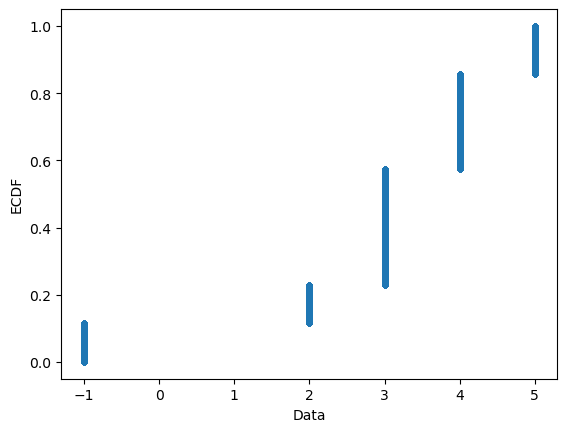

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 4, 4])

# Calculate the ECDF
x = np.sort(normalsp.raw_data['\"1-0-0\"'])
n = x.size
y = np.arange(1, n+1) / n

# Plot the ECDF
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Data')
plt.ylabel('ECDF')
plt.show()


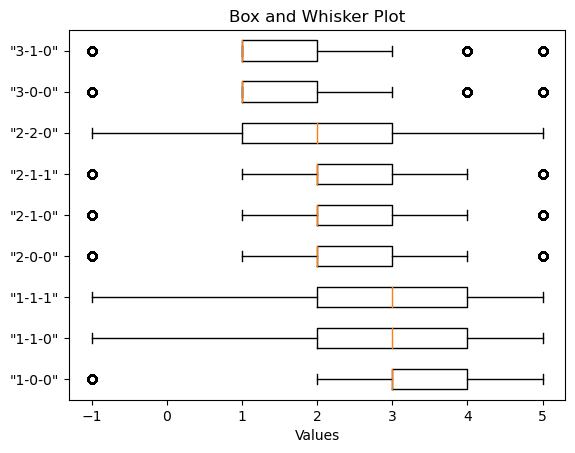

In [49]:
plt.boxplot(normalsp.raw_data.values, labels=normalsp.raw_data.columns, vert=False)
plt.xlabel('Values')
plt.title('Box and Whisker Plot')
plt.show()

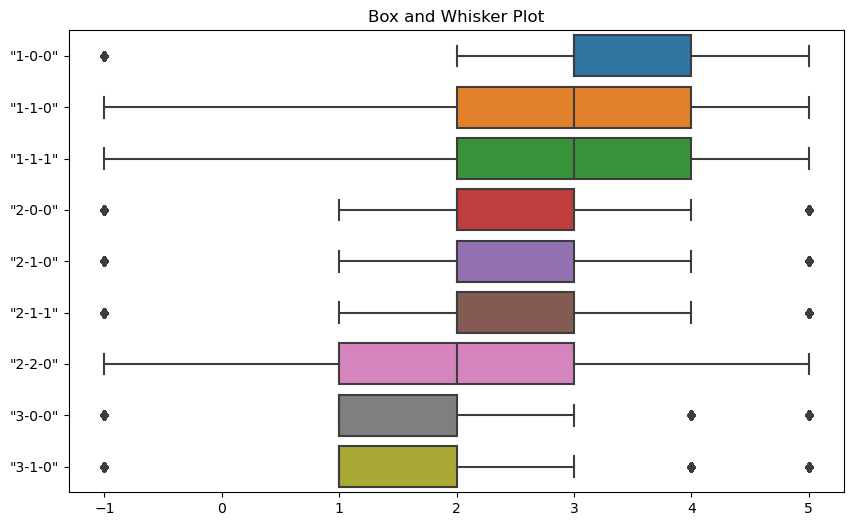

In [50]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalsp.raw_data, orient="h")
plt.title('Box and Whisker Plot')
plt.show()

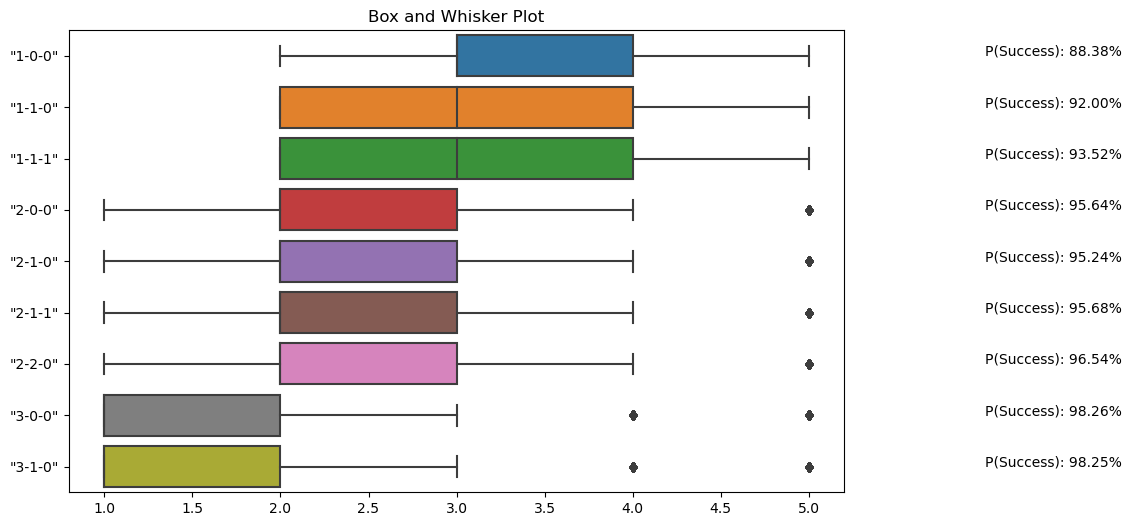

In [51]:
df = normalsp.raw_data
# Count the number of -1s in each column and remove them
neg_counts = (df == -1).sum()
total_counts = df.count()
neg_percentages =(1 - neg_counts / total_counts) * 100
df = df[df != -1]
# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h")
plt.title('Box and Whisker Plot')

# Add the counts of -1s to the plot
for i, col in enumerate(df.columns):
    plt.text(df[col].max() + 1, i, f"P(Success): {neg_percentages[col]:.2f}%")

plt.show()


# Probability Analysis

In [90]:
prob_df = make_transition_matrix()

In [145]:
prob_df

,4-0-0,3-1-0,3-0-0,2-2-0,2-1-1,2-1-0,2-0-0,1-1-1,1-1-0,1-0-0,0-0-0
0-0-0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0
1-0-0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3333,0.0000,0.6667,0.0,0.0
1-1-0,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,0.0000,0.3333,0.0000,0.0,0.0
1-1-1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
2-0-0,0.0000,0.0000,0.3333,0.0000,0.0000,0.6667,0.0000,0.0000,0.0000,0.0,0.0
2-1-0,0.0000,0.3333,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,0.0000,0.0,0.0
2-1-1,0.0000,0.3333,0.0000,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
2-2-0,0.0000,0.6667,0.0000,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
3-0-0,0.3333,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
3-1-0,0.3333,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0


In [91]:
draw_prob_df = pd_exp(prob_df, 2)

In [116]:
pd_exp(draw_prob_df, 1)

,4-0-0,3-1-0,3-0-0,2-2-0,2-1-1,2-1-0,2-0-0,1-1-1,1-1-0,1-0-0,0-0-0
0-0-0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.3333,0.000000,0.6667,0.0,0.0
1-0-0,0.000000,0.000000,0.111089,0.000000,0.000000,0.6667,0.0000,0.222211,0.0000,0.0,0.0
1-1-0,0.000000,0.222211,0.000000,0.222211,0.555511,0.0000,0.0000,0.000000,0.0000,0.0,0.0
1-1-1,0.000000,0.333300,0.000000,0.666700,0.000000,0.0000,0.0000,0.000000,0.0000,0.0,0.0
2-0-0,0.111089,0.444422,0.000000,0.222211,0.222211,0.0000,0.0000,0.000000,0.0000,0.0,0.0
2-1-0,0.111089,0.555511,0.000000,0.333300,0.000000,0.0000,0.0000,0.000000,0.0000,0.0,0.0
2-1-1,0.111089,0.666700,0.000000,0.222211,0.000000,0.0000,0.0000,0.000000,0.0000,0.0,0.0
2-2-0,0.222211,0.666700,0.000000,0.111089,0.000000,0.0000,0.0000,0.000000,0.0000,0.0,0.0
3-0-0,0.555511,0.444489,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0,0.0
3-1-0,0.555511,0.444489,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0,0.0


In [118]:
pd_exp(draw_prob_df, 2)

,4-0-0,3-1-0,3-0-0,2-2-0,2-1-1,2-1-0,2-0-0,1-1-1,1-1-0,1-0-0,0-0-0
0-0-0,0.037026,0.296274,0.0,0.222211,0.444422,0.0,0.0,0.0,0.0,0.0,0.0
1-0-0,0.135774,0.493800,0.0,0.370359,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1-1-0,0.234530,0.617278,0.0,0.148126,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1-1-1,0.333300,0.592637,0.0,0.074063,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2-0-0,0.432033,0.493837,0.0,0.074063,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2-1-0,0.493744,0.469130,0.0,0.037026,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2-1-1,0.530826,0.444489,0.0,0.024685,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2-2-0,0.617256,0.370404,0.0,0.012341,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3-0-0,0.802430,0.197570,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3-1-0,0.802430,0.197570,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
def prob_at_least(sp,min,passive):
    prob_df = make_transition_matrix()
    draw_prob_df = pd_exp(prob_df, 2)
    return np.dot((pd_exp(draw_prob_df, sp) - pd_exp(draw_prob_df, min))["4-0-0"], pd_exp(prob_df, passive).T["0-0-0"][::-1])

0.06575653345485251

In [200]:
pd_exp(prob_df, 2).T["0-0-0"][::-1]

0-0-0    0.0000
1-0-0    0.0000
1-1-0    0.6667
1-1-1    0.0000
2-0-0    0.3333
2-1-0    0.0000
2-1-1    0.0000
2-2-0    0.0000
3-0-0    0.0000
3-1-0    0.0000
4-0-0    0.0000
Name: 0-0-0, dtype: float64

In [193]:
(pd_exp(draw_prob_df, 7) - pd_exp(draw_prob_df, 4)) 

,4-0-0,3-1-0,3-0-0,2-2-0,2-1-1,2-1-0,2-0-0,1-1-1,1-1-0,1-0-0,0-0-0
0-0-0,0.319991,-0.306297,0.0,-0.013694,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-0-0,0.217902,-0.213338,0.0,-0.004564,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-1-0,0.162804,-0.160978,0.0,-0.001825,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-1-1,0.132584,-0.131671,0.0,-0.000913,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2-0-0,0.114778,-0.113865,0.0,-0.000913,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2-1-0,0.097434,-0.096978,0.0,-0.000456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2-1-1,0.088698,-0.088394,0.0,-0.000304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2-2-0,0.071050,-0.070898,0.0,-0.000152,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3-0-0,0.035606,-0.035606,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3-1-0,0.035606,-0.035606,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Max 11 SP

In [54]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
test_hands(normalsp, starting_hands, 1000000 )

Mean SP used for a paticular hand given current SP

In [ ]:
normalsp.dfmeans

Standard Deviation of SP used for a paticular had given current SP

In [ ]:
normalsp.dfstds

Probability of getting max damage bonus given a starting hand and current SP

In [ ]:
df_p_4_or_more = normalsp.cdf_prob(4)

In [ ]:
df_p_4_or_more

Probability of getting 3 damage bonuses given a starting hand and current SP

In [ ]:
df_p_3_or_more = normalsp.cdf_prob(3)

In [ ]:
df_p_3_or_more

## Very Large SP

In [ ]:
infsp = DrawStats([10000])
test_hands(infsp, starting_hands=starting_hands, trials = 10000000)

In [ ]:
infsp.means

In [ ]:
infsp.stds

In [ ]:
p4 = infsp.prob_at_least_for_single_row()

Probability of getting at least X number of draws given the state of your hand assuming infinite SP available (This will be closer to like theoretical expected values)

In [ ]:
p4

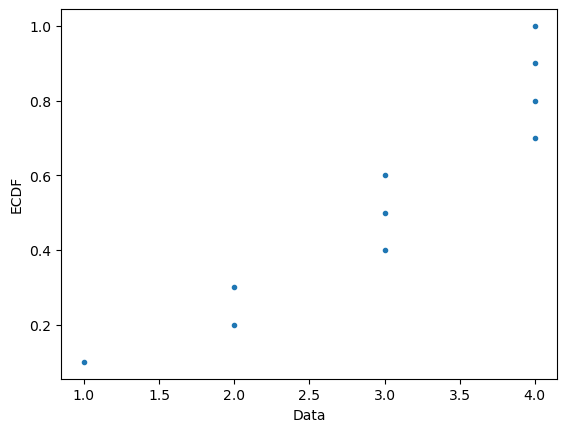